In [1]:
from pathlib import Path

import polars as pl
import matplotlib.pyplot as plt

In [2]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [4]:
df = pl.read_parquet("/content/drive/MyDrive/datasets/entp_data/user_entp_df_raw")

In [19]:
print(df.shape)
print(df.head())
df['user_id'].n_unique()

(48373586, 3)
shape: (5, 3)
┌─────────────────────────────────┬────────────────────┬─────────────┐
│ user_id                         ┆ songs_id           ┆ songs_count │
│ ---                             ┆ ---                ┆ ---         │
│ str                             ┆ str                ┆ i64         │
╞═════════════════════════════════╪════════════════════╪═════════════╡
│ b80344d063b5ccb3212f76538f3d9e… ┆ SOAKIMP12A8C130995 ┆ 1           │
│ b80344d063b5ccb3212f76538f3d9e… ┆ SOAPDEY12A81C210A9 ┆ 1           │
│ b80344d063b5ccb3212f76538f3d9e… ┆ SOBBMDR12A8C13253B ┆ 2           │
│ b80344d063b5ccb3212f76538f3d9e… ┆ SOBFNSP12AF72A0E22 ┆ 1           │
│ b80344d063b5ccb3212f76538f3d9e… ┆ SOBFOVM12A58A7D494 ┆ 1           │
└─────────────────────────────────┴────────────────────┴─────────────┘


1019318

In [35]:
user_song_counts = df.group_by("user_id").agg(
    pl.col("songs_count").sum().alias("total_songs")
)

user_song_counts

user_id,total_songs
str,i64
"""42e84f0bd35c570d146e417952ac90…",553
"""7e3dd2b8397a5a7500f36a77eb5863…",249
"""8f5a0c7650b4fb07b927316a5fb87f…",19
"""4aa622671dc0eadfc5a6ec43aae9f3…",138
"""37e5282da446b7d275520d2c9f82c6…",237
…,…
"""9329c8c4dde5ff97501e04577d34a3…",124
"""cce67d5305238e22ba4513b067c584…",14
"""ce278ed9846647fe3aed882d0c2a5c…",124


In [45]:
median = user_song_counts.select(pl.col("total_songs").median()).item()
percentiles = user_song_counts.select(
    [
        pl.col("total_songs").quantile(0.001, "nearest").alias("0.1%"),
        pl.col("total_songs").quantile(0.01, "nearest").alias("1%"),
        pl.col("total_songs").quantile(0.25, "nearest").alias("25%"),
        pl.col("total_songs").quantile(0.5, "nearest").alias("50%"),
        pl.col("total_songs").quantile(0.75, "nearest").alias("75%"),
        pl.col("total_songs").quantile(0.95, "nearest").alias("95%"),
        pl.col("total_songs").quantile(0.99, "nearest").alias("99%"),
        pl.col("total_songs").quantile(1.0, "nearest").alias("100%"),
    ]
)

distribution = user_song_counts.group_by("total_songs").count().sort("total_songs")

print(f"Median number of songs per user: {median}")
print("\nPercentiles:")
print(percentiles)

print("\nDistribution (song count → number of users):")
print(distribution)

Median number of songs per user: 73.0

Percentiles:
shape: (1, 8)
┌──────┬──────┬──────┬──────┬───────┬───────┬───────┬─────────┐
│ 0.1% ┆ 1%   ┆ 25%  ┆ 50%  ┆ 75%   ┆ 95%   ┆ 99%   ┆ 100%    │
│ ---  ┆ ---  ┆ ---  ┆ ---  ┆ ---   ┆ ---   ┆ ---   ┆ ---     │
│ f64  ┆ f64  ┆ f64  ┆ f64  ┆ f64   ┆ f64   ┆ f64   ┆ f64     │
╞══════╪══════╪══════╪══════╪═══════╪═══════╪═══════╪═════════╡
│ 10.0 ┆ 11.0 ┆ 34.0 ┆ 73.0 ┆ 163.0 ┆ 470.0 ┆ 884.0 ┆ 13132.0 │
└──────┴──────┴──────┴──────┴───────┴───────┴───────┴─────────┘

Distribution (song count → number of users):
shape: (2_333, 2)
┌─────────────┬───────┐
│ total_songs ┆ count │
│ ---         ┆ ---   │
│ i64         ┆ u32   │
╞═════════════╪═══════╡
│ 10          ┆ 6416  │
│ 11          ┆ 9141  │
│ 12          ┆ 10417 │
│ 13          ┆ 11151 │
│ 14          ┆ 11720 │
│ …           ┆ …     │
│ 6494        ┆ 1     │
│ 7015        ┆ 1     │
│ 8210        ┆ 1     │
│ 9884        ┆ 1     │
│ 13132       ┆ 1     │
└─────────────┴───────┘


<ipython-input-45-7a9692e498f3>:15: DeprecationWarning: `GroupBy.count` is deprecated. It has been renamed to `len`.
  distribution = user_song_counts.group_by("total_songs").count().sort("total_songs")


In [20]:
x = distribution["total_songs"].to_numpy()
y = distribution["count"].to_numpy()

min_songs = x.min()
max_songs = x.max()
print(f"Min total songs per user: {min_songs}")
print(f"Max total songs per user: {max_songs}")

Min total songs per user: 10
Max total songs per user: 13132


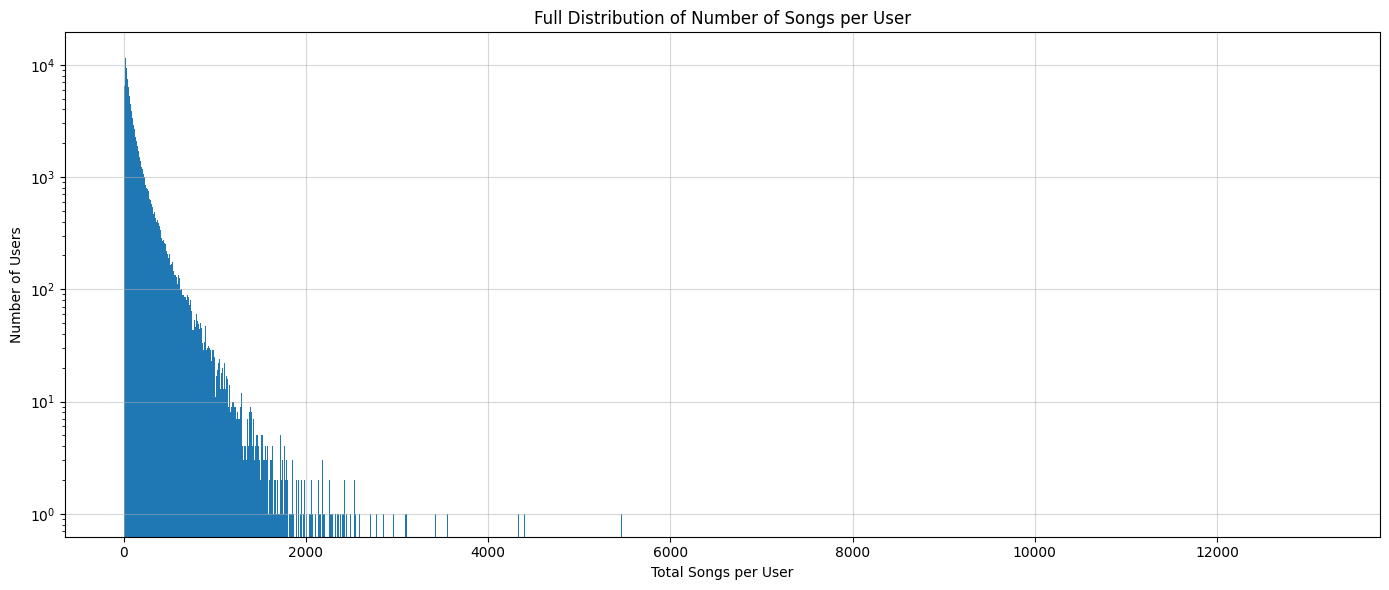

In [39]:
plt.figure(figsize=(14, 6))
plt.bar(x, y, width=1.0)
plt.xlabel("Total Songs per User")
plt.ylabel("Number of Users")
plt.title("Full Distribution of Number of Songs per User")
plt.grid(True, alpha=0.5)
plt.yscale("log")
plt.tight_layout()
plt.show()